In [4]:
import pandas as pd


In [5]:
df = pd.read_csv("data/justeat.csv")

In [1]:
df.isnull().values.any()

NameError: name 'df' is not defined

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15414 entries, 0 to 15413
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   searched_zipcode   15414 non-null  object 
 1   searched_category  15414 non-null  object 
 2   searched_lat       15414 non-null  float64
 3   searched_lng       15414 non-null  float64
 4   Restaurant_Name    15414 non-null  object 
 5   restaurant_id      15414 non-null  int64  
 6   loc_number         15414 non-null  int64  
 7   City               15414 non-null  object 
 8   Address            15414 non-null  object 
 9   Postcode           15414 non-null  object 
 10  Latitude           15414 non-null  object 
 11  Longitude          284 non-null    object 
 12  cuisines           15414 non-null  object 
 13  offers             3750 non-null   object 
 14  delivery_fee_raw   0 non-null      float64
 15  delivery_fee       15414 non-null  float64
 16  delivery_time_raw  151

In [94]:
df['RunDate'] = pd.to_datetime(df['RunDate'])

In [95]:
df.head()

,searched_zipcode,searched_category,searched_lat,searched_lng,Restaurant_Name,restaurant_id,loc_number,City,Address,Postcode,...,delivery_fee_raw,delivery_fee,delivery_time_raw,delivery_time,service_fee_raw,service_fee,distance,review_count,review_rating,RunDate
0,EC1A 7EB,London_Center,51.518089,-0.099223,Ruby Murray,1001,38811,London,FirstLine1 Lever Street,EC1V 3QU,...,NaN,0.00,30-45,37.5,NaN,0.0,0.6,2222,5.16,2022-04-25
1,EC1A 7EB,London_Center,51.518089,-0.099223,Naar Lebanese takeaway,1002,162699,London,FirstLine94 Old Street,EC1V 9AY,...,NaN,2.49,25-40,32.5,NaN,0.0,0.5,11,4.73,2022-04-25
2,EC1A 7EB,London_Center,51.518089,-0.099223,Dhaba Kitchen - Street Food,1003,129948,London,FirstLine73 Wentworth Street,E1 7TD,...,NaN,0.99,30-45,37.5,NaN,0.0,1.1,38,5.45,2022-04-25
3,EC1A 7EB,London_Center,51.518089,-0.099223,GUGSU,1004,165209,London,FirstLine68 Whitechapel High Street,E1 7PL,...,NaN,2.49,15-30,22.5,NaN,0.0,1.3,31,4.88,2022-04-25
4,EC1A 7EB,London_Center,51.518089,-0.099223,Enso,1005,122029,London,FirstLine94 Brick Lane,E1 6RL,...,NaN,0.99,40-55,47.5,NaN,0.0,1.2,298,4.43,2022-04-25


In [97]:
df['RunDate'] = df['RunDate'].dt.date

In [99]:
df['RunDate'].head()

0    2022-04-25
1    2022-04-25
2    2022-04-25
3    2022-04-25
4    2022-04-25
Name: RunDate, dtype: object

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15414 entries, 0 to 15413
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   searched_zipcode   15414 non-null  object        
 1   searched_category  15414 non-null  object        
 2   searched_lat       15414 non-null  float64       
 3   searched_lng       15414 non-null  float64       
 4   Restaurant_Name    15414 non-null  object        
 5   restaurant_id      15414 non-null  int64         
 6   loc_number         15414 non-null  int64         
 7   City               15414 non-null  object        
 8   Address            15414 non-null  object        
 9   Postcode           15414 non-null  object        
 10  Latitude           15414 non-null  object        
 11  Longitude          284 non-null    object        
 12  cuisines           15414 non-null  object        
 13  offers             3750 non-null   object        
 14  delive

Converting the Flat File into Dimension Modelling


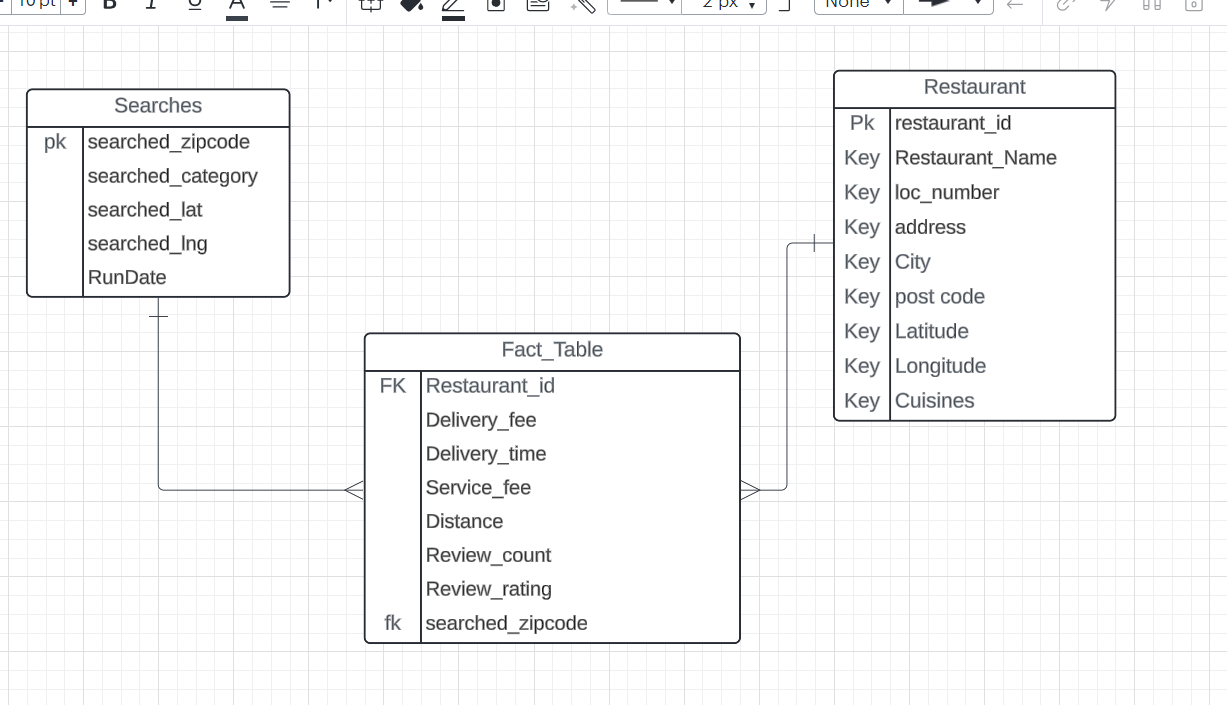


In [64]:
#Create Restaurants Dimension Table
restaurants_Dim = df[
    [
        "restaurant_id",
        "Restaurant_Name",
        "Address",
        "City",
        "Postcode",
        "cuisines",  # May require further processing to separate cuisines
        "offers",  # Might need additional handling
        "delivery_fee_raw",  # Might need additional handling
        "delivery_time_raw",  # Might need additional handling
        "service_fee_raw",  # Might need additional handling
    ]
].drop_duplicates()

In [65]:
restaurants_Dim = restaurants_Dim.fillna(0)

In [71]:
restaurants_Dim = restaurants_Dim.reset_index(drop=True)

In [72]:
restaurants_Dim.head()

,restaurant_id,Restaurant_Name,Address,City,Postcode,cuisines,offers,delivery_fee_raw,delivery_time_raw,service_fee_raw
0,1001,Ruby Murray,FirstLine1 Lever Street,London,EC1V 3QU,"Indian,Curry,Halal,Collect stamps,Low De",10% off when you spend £20,0.0,30-45,0.0
1,1002,Naar Lebanese takeaway,FirstLine94 Old Street,London,EC1V 9AY,"Lebanese,Grill",0,0.0,25-40,0.0
2,1003,Dhaba Kitchen - Street Food,FirstLine73 Wentworth Street,London,E1 7TD,"Indian,Grill,Collect stamps,Low Delivery Fee",25% off your order today,0.0,30-45,0.0
3,1004,GUGSU,FirstLine68 Whitechapel High Street,London,E1 7PL,ChineseNoodlesHalalCollect stamps,25% off your order today,0.0,15-30,0.0
4,1005,Enso,FirstLine94 Brick Lane,London,E1 6RL,JapaneseSushiCollect stampsLow Delivery Fee,40% off your order today,0.0,40-55,0.0


In [73]:
# Create the Searches dimension Table
searches_Dim = df[
    [
        "searched_zipcode",
        "searched_category",
        "searched_lat",
        "searched_lng",
        "RunDate",
    ]
].drop_duplicates()

In [74]:
searches_Dim = searches_Dim.fillna(0)

In [76]:
searches_Dim = searches_Dim.reset_index(drop=True)

In [77]:
searches_Dim.head()

,searched_zipcode,searched_category,searched_lat,searched_lng,RunDate
0,EC1A 7EB,London_Center,51.518089,-0.099223,2022-04-25 01:01:00
1,EC1R 4RG,London_Center,51.527648,-0.108138,2022-04-25 01:01:00
2,EC4Y 8JP,London_Center,51.513643,-0.105086,2022-04-25 01:01:00
3,WC1A 2PY,London_Center,51.516326,-0.123769,2022-04-25 01:01:00
4,WC1N 3AU,London_Center,51.521381,-0.122697,2022-04-25 01:01:00


In [79]:
restaurant_search_details_Fact_Table = df[
    [
        "restaurant_id",
        "delivery_fee",  # Assuming these values are processed/cleaned
        "delivery_time",
        "service_fee",
        "distance",
        "review_count",
        "review_rating",
    ]
]

In [82]:
restaurant_search_details_Fact_Table.reset_index(drop=True)

,restaurant_id,delivery_fee,delivery_time,service_fee,distance,review_count,review_rating
0,1001,0.00,37.5,0.0,0.6,2222,5.16
1,1002,2.49,32.5,0.0,0.5,11,4.73
2,1003,0.99,37.5,0.0,1.1,38,5.45
3,1004,2.49,22.5,0.0,1.3,31,4.88
4,1005,0.99,47.5,0.0,1.2,298,4.43
...,...,...,...,...,...,...,...
15409,15510,2.49,37.5,0.0,1.2,42,5.65
15410,5183,2.00,37.5,20.0,1.4,82,5.45
15411,15511,2.49,27.5,0.0,1.3,53,3.08
15412,15512,2.49,32.5,0.0,1.1,4,6.00
